In [10]:
!pip install scikit-learn

In [11]:
import sklearn
from sklearn import datasets
import pandas as pd
import numpy as np



In [12]:
iris = datasets.load_iris()
x= iris.data   # x contains the feature data(attributes)
y= iris.target  # y contains the target labels(classification)
iris




{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [13]:
# The line iris by itself wont produce a dataframe because iris is a 
# custom object created by datasets.load_iris(). it is a special data structure from scikit-learn to hold the dataser information


In [14]:
iris_df = pd.DataFrame(x,columns = iris.feature_names)
iris_df['target'] = y
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
print('Iris dataset information:')
print(' * Feature names:',iris.feature_names)
print(' * Target names:', iris.target_names)
print(' * Number of samples:',iris.data.shape[0])
print(' * Number of features:',iris.data.shape[1])

Iris dataset information:
 * Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
 * Target names: ['setosa' 'versicolor' 'virginica']
 * Number of samples: 150
 * Number of features: 4


## Data Cleaning

In [16]:
print('Checking for missing values:')
print(iris_df.isnull().sum())  # Check if any columns have missing values

Checking for missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [17]:
# Check for duplicates based on all columns
print('\nChecking for duplicates:')
duplicated_rows = iris_df[iris_df.duplicated()]
print('Duplicated found:')
print(duplicated_rows)


Checking for duplicates:
Duplicated found:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
142                5.8               2.7                5.1               1.9   

     target  
142       2  


In [18]:
# Remove duplicates
df_cleaned = iris_df.drop_duplicates()
print('\nDataFrame after removing duplicates:')
df_cleaned


DataFrame after removing duplicates:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Data Transformation

In [19]:
from sklearn.preprocessing import StandardScaler
# Perform feature scaling using StandardSacler 
# It is basically used to standardize means making mean =0 and variance=1

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Convert scaled features back to a DataFrame for visualization(optional)
df_scaled = pd.DataFrame(data= x_scaled, columns = iris.feature_names)

# Display the scaled features DataFrame()

print('\nScaled Features DataFrame:')

df_scaled


Scaled Features DataFrame:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


### Feature Selection

In [20]:
from sklearn.feature_selection import SelectKBest, f_classif
# Feature selection using SelectKBest with ANOVA F-value as score function

selector = SelectKBest(score_func= f_classif, k=2) # Select top 2 features
x_selected = selector.fit_transform(iris_df,y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = iris_df.columns[selected_indices]

# Print selected features and their indices
print('Selected Features:')
for i,feature in enumerate(selected_features):
    print(f'{i+1}.{feature}')
    
    # print the shape of the selected feature matrix
    print(f'\nShape of x_selected:{x_selected.shape}')

Selected Features:
1.petal length (cm)

Shape of x_selected:(150, 2)
2.target

Shape of x_selected:(150, 2)


C:\Users\Aditya\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


## Classification in the iris dataset using a Support Vector Machine(SVM) classifier from Scikit-learn

In [21]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [22]:
iris = datasets.load_iris()
x= iris.data
y= iris.target

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Initialize SVM classifier
clf= SVC(kernel='rbf',random_state=42)

# Train the classifier
clf.fit(x_train,y_train)

# predict the test data
y_pred = clf.predict(x_test)

# Evaluate the classifier
print('Classification Report:')
print(classification_report(y_test,y_pred))

accuracy = accuracy_score(y_test,y_pred)
print(f"\nAccuracy : {accuracy:.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Accuracy : 1.00


## Linear Regression

In [23]:
# Performig lr on the iris dataset is not appropriate
# bcz iris dataset is typically used for classifiaction tasks where the target
# variable(y) represents classes of iris species(0,1,2). 
# Linear Regression, on the other hand, is used for predicting continuous values rather than categorical classes

In [24]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [25]:
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Splitting the data into training and testing
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Initiliaze the linear regression model
regressor = LinearRegression()

regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("mean squared error:",mse)
print('r-squared:',r2)

mean squared error: 0.555891598695242
r-squared: 0.5757877060324526


# Clustering

In [26]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [28]:
iris = datasets.load_iris()
X = iris.data  # Using only the features , not he labels

# Initialze KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)

# fitting the model
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Visualizzing the clusters using 2 dimension sepal length and width
plt.figure(figsize=(8,6))

C:\Users\Aditya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Aditya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

AttributeError: 'KMeans' object has no attribute 'cluster_centers'

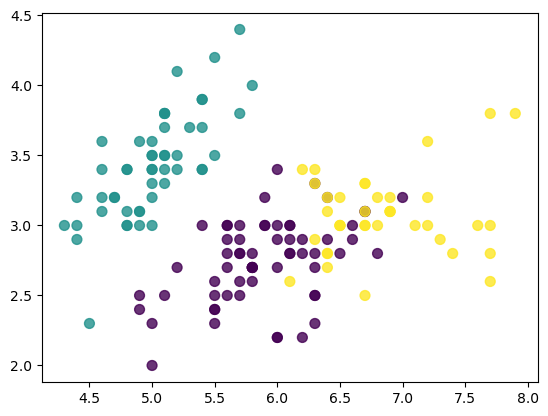

In [29]:
plt.scatter(X[:,0], X[:,1], c=cluster_labels, cmap='viridis',s=50,alpha=0.8, label='Data Points')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers[:,1],marker ='x',s=200,c='red',label='Centroids')
plt.xlabel('Sepal length cm')
ply.ylabel('Sepal Width cm')
plt.title('kmeans clustering on iris dataset')
plt.show()